# Esercitazione 6
L'esercitazione 6 richiedeva di studiare i parametri termodinamici energia interna per spin, $U/N$, capacità termica, $C$, suscettività magnetica, $\chi$, e magnetizzazione, $M$,  di un sistema di spin 1D secondo il modello di Ising, calcolandone l'andamento in funzione della temperatura. In particolare, si richiedeva di implementare due algoritmi, l'uno che sfruttasse il l'algoritmo di Metropolis, l'altro che funzionasse secondo l'algoritmo di Gibbs, confrontando i risultati prodotti da entrambi i metodi con la soluzione analitica. Ho simulato una cella 1D di 50 spin con condizioni periodiche al contorno, con configurazione iniziale di spin randomica. La configurazione a $T=0.5$, da cui sono partito a calcolare i valori dei parametri, non è compatibile con una generica comfigurazione randomica. Per tale motivo, prima di registrare i valori dei parametri, ho eseguito una simulazione "a vuoto", per equilibrare il sistema e avere una configurazione di partenza da cui far partire la simulazione. Ho simulato il sistema nell'intervallo di temperature $T\in[0.5,2.0]$, con passo uniforme $\delta_T=0.1$. La configurazione finale della simulazione ad una data temperatura $T$ è stata usata come configurazione iniziale della simulazione al passo successivo, dato che non erano previste brusche variazioni del sistema nell'intervallo di temperature considerato. Il sistema è stato simulato in $M=5\times10^5$ suddivisi in $N=50$ blocchi. Per la stima della magnetizzazione ho introdotto un campo esterno $h=0.02$ (altrimenti $M$ sarebbe stata sempre pari a $0$).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_palette = sns.color_palette("bright")

points=100
T = np.linspace(0.3,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

## Energia interna

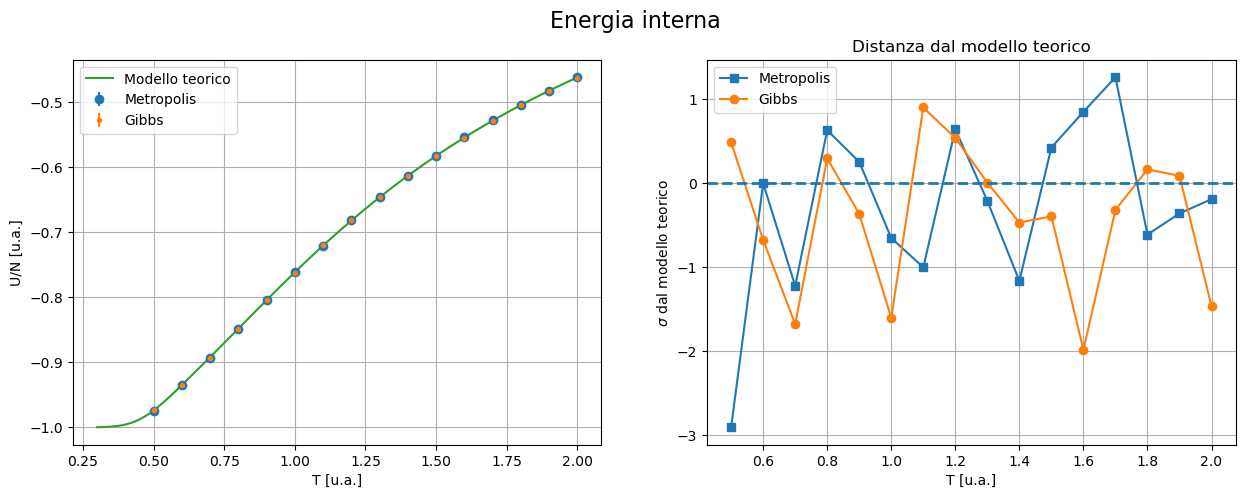

In [2]:
e = -J*( th + ch*thN )/( 1 + thN )
x, sum41, error = np.loadtxt("risultati/METRO/final.ene", usecols=(0,1,2), unpack='true')
x2, sum42, error2 = np.loadtxt("risultati/GIBBS/final.ene", usecols=(0,1,2), unpack='true')

betax = 1/x
thx = np.tanh(J/x)
thNx= thx**Ns
chx = 1/thx

ex = -J*( thx + chx*thNx )/( 1 + thNx )
diffM = (sum41-ex)/error
diffG = (sum42-ex)/error2 

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle("Energia interna", size=16)

ax0.errorbar(x,sum41,yerr=error,marker='o', linestyle='none', label='Metropolis')
ax0.errorbar(x,sum42,yerr=error2,marker='.', linestyle='none', label='Gibbs')
ax0.plot(T, e,label='Modello teorico' )
ax0.set_xlabel('T [u.a.]')
ax0.set_ylabel('U/N [u.a.]')
ax0.grid(True)
ax0.legend()

ax1.plot(x, diffM, marker='s', label='Metropolis')
ax1.plot(x2, diffG, marker='o',  label='Gibbs')
ax1.axhline(y=0, ls='--', lw=2)
ax1.set_title("Distanza dal modello teorico")
ax1.set_xlabel('T [u.a.]')
ax1.set_ylabel("$\sigma$ dal modello teorico")
ax1.grid(True)
ax1.legend()

plt.show()

I valori calcolati con Metropolis e Gibbs presentano un buon accordo con la soluzione analitica, non discostandosi oltre i $3\sigma$ dalla stessa. Gli errori non sembrano presenare una chiara correlazione tra di loro.

## Capacità termica

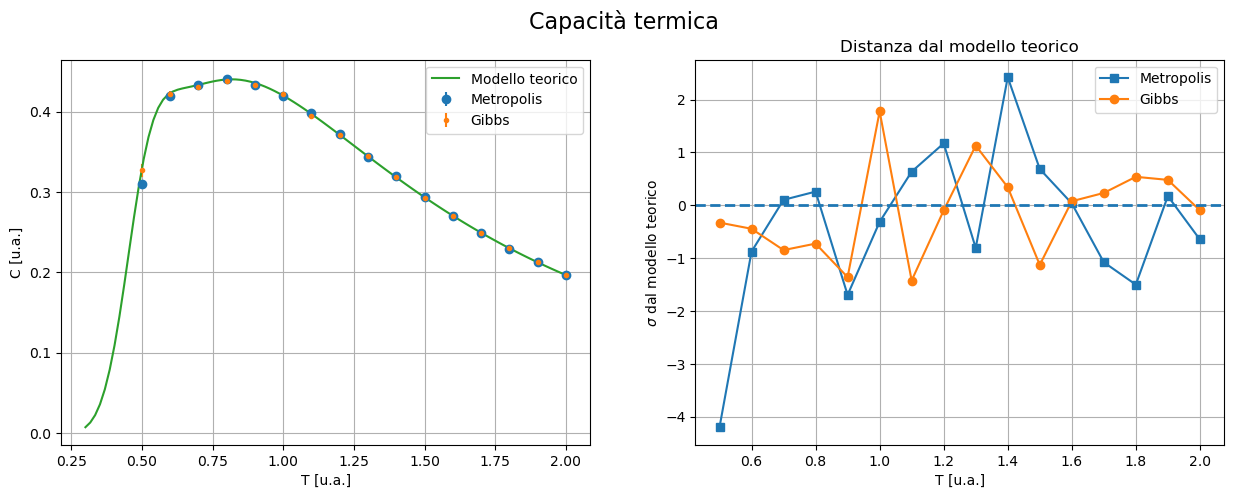

In [3]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
x, sum41, error = np.loadtxt("risultati/METRO/final.heat", usecols=(0,1,2), unpack='true')
x2, sum42, error2 = np.loadtxt("risultati/GIBBS/final.heat", usecols=(0,1,2), unpack='true')

heatx=((betax*J)**2)*(((1+thNx+(Ns-1)*(thx**2)+(Ns-1)*(chx**2)*thNx)/(1+thNx))-Ns*((thx+chx*thNx)/(1+thNx))**2)
diffM = (sum41-heatx)/error
diffG = (sum42-heatx)/error2 

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle("Capacità termica", size=16)

ax0.errorbar(x,sum41,yerr=error,marker='o', linestyle='none', label='Metropolis')
ax0.errorbar(x,sum42,yerr=error2,marker='.', linestyle='none', label='Gibbs')
ax0.plot(T, heat,label='Modello teorico' )
ax0.set_xlabel('T [u.a.]')
ax0.set_ylabel('C [u.a.]')
ax0.grid(True)
ax0.legend()

ax1.plot(x, diffM, marker='s', label='Metropolis')
ax1.plot(x2, diffG, marker='o',  label='Gibbs')
ax1.axhline(y=0, ls='--', lw=2)
ax1.set_title("Distanza dal modello teorico")
ax1.set_xlabel('T [u.a.]')
ax1.set_ylabel("$\sigma$ dal modello teorico")
ax1.grid(True)
ax1.legend()

plt.show()

I valori della capacità termica calcolati con entrambi gli algoritmi sono compatibili entro i $3\sigma$ dal modello teorico, ad eccezione della stima calcolata con Metropolis a $T=0.5$, sintomo probabile di una equilibrazione che necessitava un numero di step maggiore.

## Suscettività magnetica

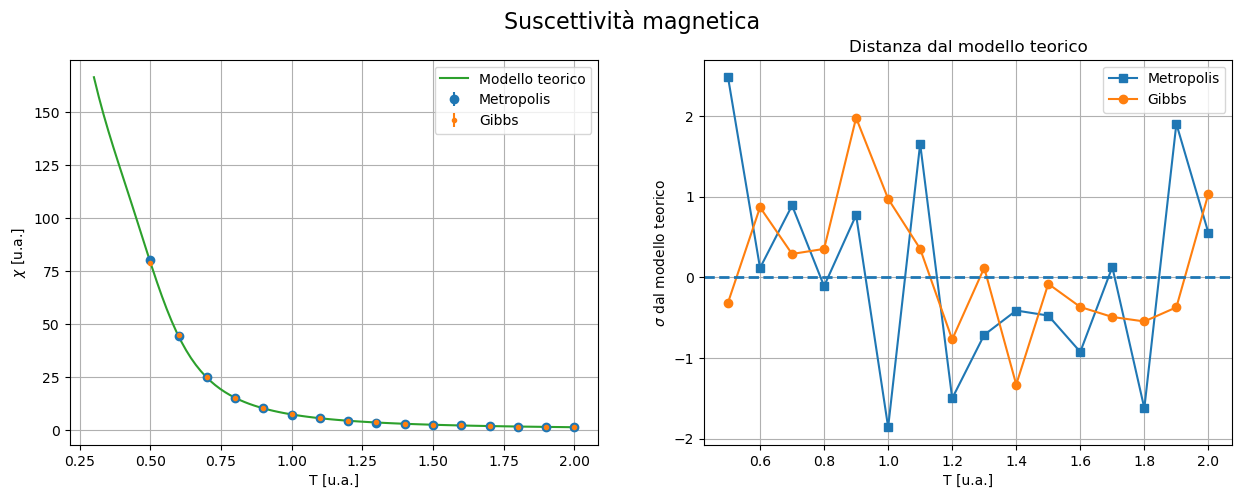

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
x, sum41, error = np.loadtxt("risultati/METRO/final.chi", usecols=(0,1,2), unpack='true')
x2, sum42, error2 = np.loadtxt("risultati/GIBBS/final.chi", usecols=(0,1,2), unpack='true')

Xx = betax*np.exp(2*betax*J)*(1-thNx)/(1+thNx)
diffM = (sum41-Xx)/error
diffG = (sum42-Xx)/error2 

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle("Suscettività magnetica", size=16)

ax0.errorbar(x,sum41,yerr=error,marker='o', linestyle='none', label='Metropolis')
ax0.errorbar(x,sum42,yerr=error2,marker='.', linestyle='none', label='Gibbs')
ax0.plot(T, X,label='Modello teorico' )
ax0.set_xlabel('T [u.a.]')
ax0.set_ylabel('$\chi$ [u.a.]')
ax0.grid(True)
ax0.legend()

ax1.plot(x, diffM, marker='s', label='Metropolis')
ax1.plot(x2, diffG, marker='o',  label='Gibbs')
ax1.axhline(y=0, ls='--', lw=2)
ax1.set_title("Distanza dal modello teorico")
ax1.set_xlabel('T [u.a.]')
ax1.set_ylabel("$\sigma$ dal modello teorico")
ax1.grid(True)
ax1.legend()

plt.show()

La suscettività magnetica  ...

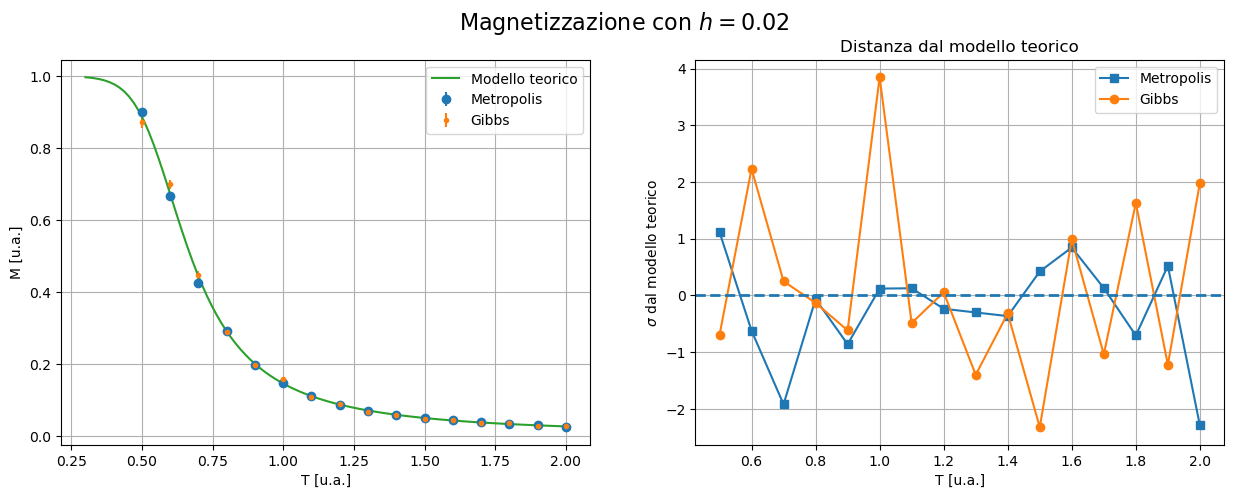

In [6]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

x, sum41, error = np.loadtxt("risultati/METRO/final.mag", usecols=(0,1,2), unpack='true')
x2, sum42, error2 = np.loadtxt("risultati/GIBBS/final.mag", usecols=(0,1,2), unpack='true')

bx=1/x
l1x = np.exp(bx*J)*np.cosh(bx*h)+np.sqrt(np.exp(2*bx*J)*np.cosh(bx*h)*np.cosh(bx*h)-2*np.sinh(2*bx*J))
l2x = np.exp(bx*J)*np.cosh(bx*h)-np.sqrt(np.exp(2*bx*J)*np.cosh(bx*h)*np.cosh(bx*h)-2*np.sinh(2*bx*J))
Zx = l1x**Ns + l2x**Ns
Mx = (np.exp(bx*J)*np.sinh(bx*h)*((l1x**(Ns-1))*(1+np.exp(bx*J)*np.cosh(bx*h)/np.sqrt(np.exp(2*bx*J)*np.cosh(bx*h)*np.cosh(bx*h)-2*np.sinh(2*bx*J))) 
        + (l2x**(Ns-1))*(1-np.exp(bx*J)*np.cosh(bx*h)/np.sqrt(np.exp(2*bx*J)*np.cosh(bx*h)*np.cosh(bx*h)-2*np.sinh(2*bx*J)))))/(Zx)
diffM = (sum41-Mx)/error
diffG = (sum42-Mx)/error2 

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle("Magnetizzazione con $h=0.02$", size=16)

ax0.errorbar(x,sum41,yerr=error,marker='o', linestyle='none', label='Metropolis')
ax0.errorbar(x,sum42,yerr=error2,marker='.', linestyle='none', label='Gibbs')
ax0.plot(T, M,label='Modello teorico' )
ax0.set_xlabel('T [u.a.]')
ax0.set_ylabel('M [u.a.]')
ax0.grid(True)
ax0.legend()

ax1.plot(x, diffM, marker='s', label='Metropolis')
ax1.plot(x2, diffG, marker='o',  label='Gibbs')
ax1.axhline(y=0, ls='--', lw=2)
ax1.set_title("Distanza dal modello teorico")
ax1.set_xlabel('T [u.a.]')
ax1.set_ylabel("$\sigma$ dal modello teorico")
ax1.grid(True)
ax1.legend()

plt.show()